In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
data = pd.read_csv('Accident_train.csv')

In [112]:
data.shape

(10043, 17)

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10043 entries, 0 to 10042
Data columns (total 17 columns):
Collision_Ref_No              10043 non-null int64
Policing_Area                 9709 non-null object
Collision_Severity            10043 non-null int64
Weekday_of_Collision          10043 non-null object
Day_of_Collision              10043 non-null int64
Month_of_Collision            10043 non-null int64
Hour_of_Collision             9759 non-null float64
Carriageway_Type              10043 non-null int64
Speed_Limit                   10043 non-null int64
Junction_Detail               9750 non-null float64
Junction_Control              9744 non-null float64
Ped_Crossing_HC               9722 non-null float64
Ped_Crossing_PC               9743 non-null float64
Light_Conditions              10043 non-null int64
Weather_Conditions            10043 non-null int64
Road_Surface_Conditions       9734 non-null float64
Special_Conditions_at_Site    9755 non-null float64
dtypes: float64(

In [114]:
data['Weekday_of_Collision'].unique()

array(['MON', 'SAT', 'WED', 'SUN', 'TUE', 'FRI', 'THU'], dtype=object)

In [115]:
weekday_dict = {'MON':'1','TUE':'2','WED':'3','THU':'4','FRI':'5','SAT':'6','SUN':'7'}

In [116]:
data['Weekday_of_Collision'] = data['Weekday_of_Collision'].map(weekday_dict)

In [117]:
data['Weekday_of_Collision'].unique()

array(['1', '6', '3', '7', '2', '5', '4'], dtype=object)

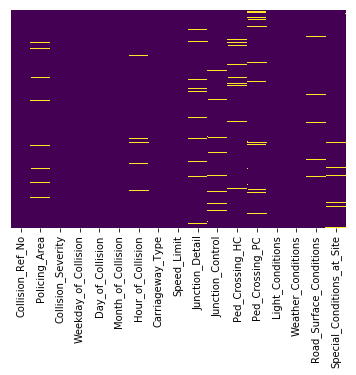

In [118]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [119]:
def populate_policing_area(record):
    policing_area = record[0]
    colision_severity = record[1]
    
    if pd.isnull(policing_area):
        if colision_severity == 1:
            return 'NEWM'
        else:
            return 'BELC'
    else:
        return policing_area

In [120]:
data['Policing_Area'] = data[['Policing_Area','Collision_Severity']].apply(populate_policing_area,axis=1)

In [121]:
data['Hour_of_Collision'] = data['Hour_of_Collision'].fillna(value=17.0)
data['Junction_Detail'] = data['Junction_Detail'].fillna(value=1.0)
data['Junction_Control'] = data['Junction_Control'].fillna(value=7.0)
data['Ped_Crossing_HC'] = data['Ped_Crossing_HC'].fillna(value=1.0)
data['Ped_Crossing_PC'] = data['Ped_Crossing_PC'].fillna(value=1.0)
data['Road_Surface_Conditions'] = data['Road_Surface_Conditions'].fillna(value=1.0)
data['Special_Conditions_at_Site'] = data['Special_Conditions_at_Site'].fillna(value=1.0)

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10043 entries, 0 to 10042
Data columns (total 17 columns):
Collision_Ref_No              10043 non-null int64
Policing_Area                 10043 non-null object
Collision_Severity            10043 non-null int64
Weekday_of_Collision          10043 non-null object
Day_of_Collision              10043 non-null int64
Month_of_Collision            10043 non-null int64
Hour_of_Collision             10043 non-null float64
Carriageway_Type              10043 non-null int64
Speed_Limit                   10043 non-null int64
Junction_Detail               10043 non-null float64
Junction_Control              10043 non-null float64
Ped_Crossing_HC               10043 non-null float64
Ped_Crossing_PC               10043 non-null float64
Light_Conditions              10043 non-null int64
Weather_Conditions            10043 non-null int64
Road_Surface_Conditions       10043 non-null float64
Special_Conditions_at_Site    10043 non-null float64
dtypes: 

In [123]:
data['Policing_Area'].unique()

array(['CREA', 'BELC', 'LISB', 'MIDU', 'FOYL', 'ANTN', 'ARBC', 'NABB',
       'CCGL', 'ANTR', 'LISC', 'ARND', 'NDOW', 'FERO', 'DCST', 'DAST',
       'BMEN', 'FERM', 'BELN', 'ARMA', 'COLE', 'MOYL', 'BELE', 'BELW',
       'CRAI', 'COOK', 'MEAN', 'BELS', 'STRB', 'CFER', 'OMAG', 'NEMD',
       'ARDS', 'LIMA', 'DOWN', 'BANB', 'NEWM', 'BMON', 'MFEL', 'LARN'], dtype=object)

In [124]:
#policing_area_map = {'CREA':1, 'BELC':2, 'LISB':3, 'MIDU':4, 'FOYL':5, 'ANTN':6, 'ARBC':7, 'NABB':8,
#       'CCGL':9, 'ANTR':10, 'LISC':11, 'ARND':12, 'NDOW':13, 'FERO':14, 'DCST':15, 'DAST':16,
#       'BMEN':17, 'FERM':18, 'BELN':19, 'ARMA':20, 'COLE':21, 'MOYL':22, 'BELE':23, 'BELW':24,
#       'CRAI':25, 'COOK':26, 'MEAN':27, 'BELS':28, 'STRB':29, 'CFER':30, 'OMAG':31, 'NEMD':32,
#       'ARDS':33, 'LIMA':34, 'DOWN':35, 'BANB':36, 'NEWM':37, 'BMON':38, 'MFEL':39, 'LARN':40}

In [59]:
#data['Policing_Area'] = data['Policing_Area'].map(policing_area_map)

In [127]:
data['Weekday_of_Collision'] = data['Weekday_of_Collision'].astype(int)

In [128]:
data_dummies = pd.get_dummies(data)

In [129]:
data_dummies.columns

Index(['Collision_Ref_No', 'Collision_Severity', 'Weekday_of_Collision',
       'Day_of_Collision', 'Month_of_Collision', 'Hour_of_Collision',
       'Carriageway_Type', 'Speed_Limit', 'Junction_Detail',
       'Junction_Control', 'Ped_Crossing_HC', 'Ped_Crossing_PC',
       'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Policing_Area_ANTN',
       'Policing_Area_ANTR', 'Policing_Area_ARBC', 'Policing_Area_ARDS',
       'Policing_Area_ARMA', 'Policing_Area_ARND', 'Policing_Area_BANB',
       'Policing_Area_BELC', 'Policing_Area_BELE', 'Policing_Area_BELN',
       'Policing_Area_BELS', 'Policing_Area_BELW', 'Policing_Area_BMEN',
       'Policing_Area_BMON', 'Policing_Area_CCGL', 'Policing_Area_CFER',
       'Policing_Area_COLE', 'Policing_Area_COOK', 'Policing_Area_CRAI',
       'Policing_Area_CREA', 'Policing_Area_DAST', 'Policing_Area_DCST',
       'Policing_Area_DOWN', 'Policing_Area_FERM', 'Policing_Area_FERO',
       'Poli

In [130]:
data.columns

Index(['Collision_Ref_No', 'Policing_Area', 'Collision_Severity',
       'Weekday_of_Collision', 'Day_of_Collision', 'Month_of_Collision',
       'Hour_of_Collision', 'Carriageway_Type', 'Speed_Limit',
       'Junction_Detail', 'Junction_Control', 'Ped_Crossing_HC',
       'Ped_Crossing_PC', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Special_Conditions_at_Site'],
      dtype='object')

In [61]:
X = data[['Policing_Area', 'Weekday_of_Collision', 'Day_of_Collision', 'Month_of_Collision',
       'Hour_of_Collision', 'Carriageway_Type', 'Speed_Limit',
       'Junction_Detail', 'Junction_Control', 'Ped_Crossing_HC',
       'Ped_Crossing_PC', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Special_Conditions_at_Site']]

y = data['Collision_Severity']

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [64]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [65]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [66]:
pred = dtc.predict(X_test)

In [67]:
from sklearn.metrics import classification_report,confusion_matrix

print('Classification report : \n',classification_report(y_test,pred))
print('confusion matrix : \n',confusion_matrix(y_test,pred))

Classification report : 
              precision    recall  f1-score   support

          1       0.12      0.16      0.14        37
          2       0.30      0.37      0.33       297
          3       0.93      0.90      0.91      2679

avg / total       0.86      0.84      0.85      3013

confusion matrix : 
 [[   6   15   16]
 [  20  111  166]
 [  25  242 2412]]


In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rfc = RandomForestClassifier()

In [70]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [71]:
pred_rfc = rfc.predict(X_test)

In [72]:
print('Classification report : \n',classification_report(y_test,pred_rfc))
print('confusion matrix : \n',confusion_matrix(y_test,pred_rfc))

Classification report : 
              precision    recall  f1-score   support

          1       0.33      0.03      0.05        37
          2       0.45      0.19      0.27       297
          3       0.91      0.98      0.94      2679

avg / total       0.86      0.89      0.87      3013

confusion matrix : 
 [[   1   11   25]
 [   2   57  238]
 [   0   58 2621]]


In [73]:
from sklearn.ensemble import GradientBoostingClassifier

In [74]:
boostclassfr = GradientBoostingClassifier()

In [75]:
boostclassfr.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [76]:
pred_boost = boostclassfr.predict(X_test)

In [77]:
print('Classification report : \n',classification_report(y_test,pred_boost))
print('confusion matrix : \n',confusion_matrix(y_test,pred_boost))

Classification report : 
              precision    recall  f1-score   support

          1       0.67      0.05      0.10        37
          2       0.68      0.17      0.27       297
          3       0.91      0.99      0.95      2679

avg / total       0.88      0.90      0.87      3013

confusion matrix : 
 [[   2    7   28]
 [   1   50  246]
 [   0   17 2662]]


In [78]:
data_test = pd.read_csv('Accident_test.csv')

In [79]:
data_test['Policing_Area'] = data_test[['Policing_Area','Collision_Severity']].apply(populate_policing_area,axis=1)

In [80]:
data_test['Hour_of_Collision'] = data_test['Hour_of_Collision'].fillna(value=17.0)
data_test['Junction_Detail'] = data_test['Junction_Detail'].fillna(value=1.0)
data_test['Junction_Control'] = data_test['Junction_Control'].fillna(value=7.0)
data_test['Ped_Crossing_HC'] = data_test['Ped_Crossing_HC'].fillna(value=1.0)
data_test['Ped_Crossing_PC'] = data_test['Ped_Crossing_PC'].fillna(value=1.0)
data_test['Road_Surface_Conditions'] = data_test['Road_Surface_Conditions'].fillna(value=1.0)
data_test['Special_Conditions_at_Site'] = data_test['Special_Conditions_at_Site'].fillna(value=1.0)

In [81]:
data_test['Policing_Area'] = data_test['Policing_Area'].map(policing_area_map)

In [82]:
data_test['Weekday_of_Collision'] = data_test['Weekday_of_Collision'].map(weekday_dict)

In [83]:
test_X = data_test[['Policing_Area', 'Weekday_of_Collision', 'Day_of_Collision', 'Month_of_Collision',
       'Hour_of_Collision', 'Carriageway_Type', 'Speed_Limit',
       'Junction_Detail', 'Junction_Control', 'Ped_Crossing_HC',
       'Ped_Crossing_PC', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Special_Conditions_at_Site']]

test_y = data_test['Collision_Severity']

In [86]:
pred_test = dtc.predict(test_X)

#print('Classification report : \n',classification_report(test_y,pred_test))
#print('confusion matrix : \n',confusion_matrix(test_y,pred_test))

In [88]:
pred_test.shape

(354,)

In [91]:
#list(range(0,pred_test.shape[0]))

In [98]:
#my_submission = pd.DataFrame({'Collision_Severity':pred_test,'S.No.':list(range(0,pred_test.shape[0]))})
my_submission = pd.DataFrame({'Collision_Severity':pred_test})

In [101]:
my_submission.index += 1

In [102]:
my_submission.to_csv('submission.csv', index=True,index_label='S.No.')

In [103]:
pred_rfc_test = rfc.predict(test_X)

In [104]:
my_submission_rfc = pd.DataFrame({'Collision_Severity':pred_rfc_test})

In [105]:
my_submission_rfc.index += 1
my_submission_rfc.to_csv('submission_rfc.csv', index=True,index_label='S.No.')

In [106]:
pred_boost_test = boostclassfr.predict(test_X)

In [107]:
my_submission_boost = pd.DataFrame({'Collision_Severity':pred_boost_test})

In [108]:
my_submission_boost.index += 1
my_submission_boost.to_csv('submission_boost.csv', index=True,index_label='S.No.')

In [180]:
data_dummies.columns

Index(['Collision_Ref_No', 'Collision_Severity', 'Weekday_of_Collision',
       'Day_of_Collision', 'Month_of_Collision', 'Hour_of_Collision',
       'Carriageway_Type', 'Speed_Limit', 'Junction_Detail',
       'Junction_Control', 'Ped_Crossing_HC', 'Ped_Crossing_PC',
       'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Policing_Area_ANTN',
       'Policing_Area_ANTR', 'Policing_Area_ARBC', 'Policing_Area_ARDS',
       'Policing_Area_ARMA', 'Policing_Area_ARND', 'Policing_Area_BANB',
       'Policing_Area_BELC', 'Policing_Area_BELE', 'Policing_Area_BELN',
       'Policing_Area_BELS', 'Policing_Area_BELW', 'Policing_Area_BMEN',
       'Policing_Area_BMON', 'Policing_Area_CCGL', 'Policing_Area_CFER',
       'Policing_Area_COLE', 'Policing_Area_COOK', 'Policing_Area_CRAI',
       'Policing_Area_CREA', 'Policing_Area_DAST', 'Policing_Area_DCST',
       'Policing_Area_DOWN', 'Policing_Area_FERM', 'Policing_Area_FERO',
       'Poli

In [181]:
X1 = data_dummies[['Weekday_of_Collision',
       'Day_of_Collision', 'Month_of_Collision', 'Hour_of_Collision',
       'Carriageway_Type', 'Speed_Limit', 'Junction_Detail',
       'Junction_Control', 'Ped_Crossing_HC', 'Ped_Crossing_PC',
       'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Policing_Area_ANTN',
       'Policing_Area_ANTR', 'Policing_Area_ARBC', 'Policing_Area_ARDS',
       'Policing_Area_ARMA', 'Policing_Area_ARND', 'Policing_Area_BANB',
       'Policing_Area_BELC', 'Policing_Area_BELE', 'Policing_Area_BELN',
       'Policing_Area_BELS', 'Policing_Area_BELW', 'Policing_Area_BMEN',
       'Policing_Area_BMON', 'Policing_Area_CCGL', 'Policing_Area_CFER',
       'Policing_Area_COLE', 'Policing_Area_COOK', 'Policing_Area_CRAI',
       'Policing_Area_CREA', 'Policing_Area_DAST', 'Policing_Area_DCST',
       'Policing_Area_DOWN', 'Policing_Area_FERM', 'Policing_Area_FERO',
       'Policing_Area_FOYL', 'Policing_Area_LARN', 'Policing_Area_LIMA',
       'Policing_Area_LISB', 'Policing_Area_LISC', 'Policing_Area_MEAN',
       'Policing_Area_MFEL', 'Policing_Area_MIDU', 'Policing_Area_MOYL',
       'Policing_Area_NABB', 'Policing_Area_NDOW', 'Policing_Area_NEMD',
       'Policing_Area_NEWM', 'Policing_Area_OMAG', 'Policing_Area_STRB']]

y1 = data['Collision_Severity']

In [182]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size=0.3)

In [153]:
#boostclassfr = GradientBoostingClassifier(loss='exponential')

In [154]:
#boostclassfr.fit(X_train1,y_train1)

In [135]:
pred_boost1 = boostclassfr.predict(X_test1)

In [136]:
print('Classification report : \n',classification_report(y_test1,pred_boost1))
print('confusion matrix : \n',confusion_matrix(y_test1,pred_boost1))

Classification report : 
              precision    recall  f1-score   support

          1       0.00      0.00      0.00        27
          2       0.62      0.17      0.27       284
          3       0.91      0.99      0.95      2702

avg / total       0.88      0.91      0.88      3013

confusion matrix : 
 [[   0    7   20]
 [   3   49  232]
 [   1   23 2678]]


In [137]:
data_test1 = pd.read_csv('Accident_test.csv')

In [140]:
data_test1['Policing_Area'] = data_test1[['Policing_Area','Collision_Severity']].apply(populate_policing_area,axis=1)

In [141]:
data_test1['Hour_of_Collision'] = data_test1['Hour_of_Collision'].fillna(value=17.0)
data_test1['Junction_Detail'] = data_test1['Junction_Detail'].fillna(value=1.0)
data_test1['Junction_Control'] = data_test1['Junction_Control'].fillna(value=7.0)
data_test1['Ped_Crossing_HC'] = data_test1['Ped_Crossing_HC'].fillna(value=1.0)
data_test1['Ped_Crossing_PC'] = data_test1['Ped_Crossing_PC'].fillna(value=1.0)
data_test1['Road_Surface_Conditions'] = data_test1['Road_Surface_Conditions'].fillna(value=1.0)
data_test1['Special_Conditions_at_Site'] = data_test1['Special_Conditions_at_Site'].fillna(value=1.0)

In [142]:
data_test1['Weekday_of_Collision'] = data_test1['Weekday_of_Collision'].map(weekday_dict)

In [143]:
data_test1['Weekday_of_Collision'] = data_test1['Weekday_of_Collision'].astype(int)

In [144]:
data_test_dummies = pd.get_dummies(data_test1)

In [145]:
data_test_dummies.columns

Index(['Collision_Ref_No', 'Weekday_of_Collision', 'Day_of_Collision',
       'Month_of_Collision', 'Hour_of_Collision', 'Carriageway_Type',
       'Speed_Limit', 'Junction_Detail', 'Junction_Control', 'Ped_Crossing_HC',
       'Ped_Crossing_PC', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Special_Conditions_at_Site',
       'Policing_Area_ANTN', 'Policing_Area_ANTR', 'Policing_Area_ARBC',
       'Policing_Area_ARDS', 'Policing_Area_ARMA', 'Policing_Area_ARND',
       'Policing_Area_BANB', 'Policing_Area_BELC', 'Policing_Area_BELE',
       'Policing_Area_BELN', 'Policing_Area_BELS', 'Policing_Area_BELW',
       'Policing_Area_BMEN', 'Policing_Area_BMON', 'Policing_Area_CCGL',
       'Policing_Area_CFER', 'Policing_Area_COLE', 'Policing_Area_COOK',
       'Policing_Area_CRAI', 'Policing_Area_CREA', 'Policing_Area_DAST',
       'Policing_Area_DCST', 'Policing_Area_DOWN', 'Policing_Area_FERM',
       'Policing_Area_FERO', 'Policing_Area_FOYL', 'Policing_Ar

In [147]:
test_X = data_test_dummies[['Weekday_of_Collision', 'Day_of_Collision',
       'Month_of_Collision', 'Hour_of_Collision', 'Carriageway_Type',
       'Speed_Limit', 'Junction_Detail', 'Junction_Control', 'Ped_Crossing_HC',
       'Ped_Crossing_PC', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Special_Conditions_at_Site',
       'Policing_Area_ANTN', 'Policing_Area_ANTR', 'Policing_Area_ARBC',
       'Policing_Area_ARDS', 'Policing_Area_ARMA', 'Policing_Area_ARND',
       'Policing_Area_BANB', 'Policing_Area_BELC', 'Policing_Area_BELE',
       'Policing_Area_BELN', 'Policing_Area_BELS', 'Policing_Area_BELW',
       'Policing_Area_BMEN', 'Policing_Area_BMON', 'Policing_Area_CCGL',
       'Policing_Area_CFER', 'Policing_Area_COLE', 'Policing_Area_COOK',
       'Policing_Area_CRAI', 'Policing_Area_CREA', 'Policing_Area_DAST',
       'Policing_Area_DCST', 'Policing_Area_DOWN', 'Policing_Area_FERM',
       'Policing_Area_FERO', 'Policing_Area_FOYL', 'Policing_Area_LARN',
       'Policing_Area_LIMA', 'Policing_Area_LISB', 'Policing_Area_LISC',
       'Policing_Area_MEAN', 'Policing_Area_MFEL', 'Policing_Area_MIDU',
       'Policing_Area_MOYL', 'Policing_Area_NABB', 'Policing_Area_NDOW',
       'Policing_Area_NEMD', 'Policing_Area_NEWM', 'Policing_Area_OMAG',
       'Policing_Area_STRB']]

#test_y = data_test['Collision_Severity']

In [148]:
pred_test_boost1 = boostclassfr.predict(test_X)

In [202]:
my_submission_boost = pd.DataFrame({'Collision_Severity':pred_test_boost1})
my_submission_boost.index += 1
my_submission_boost.to_csv('submission_boost1.csv', index=True,index_label='S.No.')

In [230]:
boostclassfr1 = GradientBoostingClassifier(max_depth=2,)

In [231]:
boostclassfr1.fit(X_test1,y_test1)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [232]:
pred_lr = boostclassfr1.predict(X_test1)

In [233]:
print('Classification report : \n',classification_report(y_test1,pred_lr))
print('confusion matrix : \n',confusion_matrix(y_test1,pred_lr))

Classification report : 
              precision    recall  f1-score   support

          1       1.00      0.37      0.54        30
          2       0.95      0.37      0.53       290
          3       0.93      1.00      0.96      2693

avg / total       0.93      0.93      0.92      3013

confusion matrix : 
 [[  11    0   19]
 [   0  108  182]
 [   0    6 2687]]


In [234]:
pred_test_boost2 = boostclassfr1.predict(test_X)

In [235]:
my_submission_boost2 = pd.DataFrame({'Collision_Severity':pred_test_boost2})
my_submission_boost2.index += 1
my_submission_boost2.to_csv('submission_boost3.csv', index=True,index_label='S.No.')

In [155]:
import tensorflow as tf

In [156]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [157]:
X1.shape, y1.shape

((10043, 54), (10043,))

In [160]:
n_hidden_1 = 20 # 1st layer number of features
n_hidden_2 = 20 # 2nd layer number of features
n_input = 54 # MNIST data input (img shape: 28*28)
n_classes = 3 # MNIST total classes (0-9 digits)
n_samples = 10043

In [159]:
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

In [161]:
def multilayer_perceptron(x, weights, biases):
    '''
    x : Place Holder for Data Input
    weights: Dictionary of weights
    biases: Dicitionary of biases
    '''
    
    # First Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    # Second Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Last Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

In [162]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [163]:
pred_mlp = multilayer_perceptron(x, weights, biases)

In [169]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=pred_mlp))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [170]:
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [176]:
X1[:10][:]

,Weekday_of_Collision,Day_of_Collision,Month_of_Collision,Hour_of_Collision,Carriageway_Type,Speed_Limit,Junction_Detail,Junction_Control,Ped_Crossing_HC,Ped_Crossing_PC,...,Policing_Area_MEAN,Policing_Area_MFEL,Policing_Area_MIDU,Policing_Area_MOYL,Policing_Area_NABB,Policing_Area_NDOW,Policing_Area_NEMD,Policing_Area_NEWM,Policing_Area_OMAG,Policing_Area_STRB
0,1,4,8,14.0,13,60,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,6,8,8,17.0,11,50,12.0,7.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,3,5,11,17.0,1,60,12.0,7.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,7,18,10,16.0,12,70,6.0,7.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,1,23,11,9.0,13,60,6.0,7.0,1.0,1.0,...,0,0,1,0,0,0,0,0,0,0
5,1,3,2,12.0,13,60,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
6,1,26,1,16.0,13,40,6.0,7.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
7,6,24,10,11.0,13,60,10.0,7.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
8,2,10,2,15.0,1,30,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
9,5,5,12,8.0,13,30,1.0,1.0,1.0,2.0,...,0,0,0,0,1,0,0,0,0,0


In [178]:
from sklearn.neural_network import MLPClassifier

In [195]:
clf = MLPClassifier(solver='adam',hidden_layer_sizes=(15,))

In [ ]:
#X_train1,X_test1,y_train1,y_test1

In [196]:
clf.fit(X_train1,y_train1)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [197]:
pred_mlp = clf.predict(X_test1)

In [198]:
print('Classification report : \n',classification_report(y_test1,pred_mlp))
print('confusion matrix : \n',confusion_matrix(y_test1,pred_mlp))

Classification report : 
              precision    recall  f1-score   support

          1       0.00      0.00      0.00        30
          2       0.00      0.00      0.00       290
          3       0.89      1.00      0.94      2693

avg / total       0.80      0.89      0.84      3013

confusion matrix : 
 [[   0    0   30]
 [   0    0  290]
 [   0    0 2693]]


/home/rahul/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [199]:
pred_test_mlp = clf.predict(test_X)

In [201]:
my_submission_mlp = pd.DataFrame({'Collision_Severity':pred_test_mlp})
my_submission_mlp.index += 1
my_submission_mlp.to_csv('submission_mlp.csv', index=True,index_label='S.No.')